In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pandas.api.types import is_string_dtype



In [2]:
data = pd.read_csv('crimedata2 (1).csv', encoding = 'latin-1')
community_title= data[['Êcommunityname','state','communityCode','countyCode']]
data.head()


,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


# Data Prepartaion

clean outliers

In [3]:
no_Community_names = data.drop(['Êcommunityname','state', 'communityCode','countyCode'], axis=1)

no_Community_names.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [4]:
#change all yo numeric
no_Community_names =no_Community_names.apply(pd.to_numeric,errors = 'coerce')

In [5]:

# Check if the column 'Name' is a string dtype
#is_string = is_string_dtype(df['Name'])
#Turn non-numeric values to nans
no_Community_names.replace('?',np.nan,inplace=True)
community_title.replace('?',np.nan,inplace=True)
# check for and remvoe missing values
data_isNA = no_Community_names.isna().sum().sum()

print('NA Sum:', data_isNA)
#replace missing values?

#change all yo numeric
no_Community_names=no_Community_names.apply(pd.to_numeric,errors = 'coerce')





NA Sum: 42147


/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/596694845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  community_title.replace('?',np.nan,inplace=True)


In [6]:
#remove nans
no_Community_names.dropna(inplace=True)

print("nans:",no_Community_names.isna().sum().sum())




nans: 0


In [7]:
#check for more '?'

contains_a = no_Community_names.applymap(lambda x: "?" in str(x))  # Convert all entries to strings
print(contains_a.count().sum())

43186


/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/1035647635.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_a = no_Community_names.applymap(lambda x: "?" in str(x))  # Convert all entries to strings


In [ ]:
#remove remaining'?'
# Create a mask for rows containing '?'
contains_a = no_Community_names.applymap(lambda x: "?" in str(x))

jk = community_title.applymap(lambda x: "?" in str(x))

# Filter out rows containing '?'
no_Community_names_cleaned = no_Community_names[~contains_a.any(axis=1)]
community_title_cleaned = community_title[~jk.any(axis=1)]
# Verify the result
print("Original Shape:", no_Community_names.shape)
print("Cleaned Shape:", no_Community_names_cleaned.shape)
print(community_title.shape)


Original Shape: (302, 143)
Cleaned Shape: (302, 143)
(2215, 4)


/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/3939086476.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_a = no_Community_names.applymap(lambda x: "?" in str(x))
/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/3939086476.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  jk = community_title.applymap(lambda x: "?" in str(x))


In [48]:
# Check if '?' is still present
contains_a_after = no_Community_names_cleaned.applymap(lambda x: "?" in str(x))
print("Remaining '?' count:", contains_a_after.any(axis=None).sum())

contains_a = community_title.applymap(lambda x: "?" in str(x))
print("Remaining '?' count:", jk.any(axis=None).sum())





Remaining '?' count: 0
Remaining '?' count: 0


/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/202866354.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_a_after = no_Community_names_cleaned.applymap(lambda x: "?" in str(x))
/var/folders/tf/z3r64v6d35ldsf86p151s0lc0000gn/T/ipykernel_5703/202866354.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_a = community_title.applymap(lambda x: "?" in str(x))


 calculate IQR and find total outliers to determine next steps

In [10]:

# Calculate IQR
Q1 = no_Community_names.quantile(0.25)
Q3 = no_Community_names.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
# Ensure lower bound is not negative
lower_bound = Q1 - 1.5 * IQR
lower_bound = lower_bound.apply(lambda x: max(x, 0))
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = no_Community_names[(no_Community_names < lower_bound) | (no_Community_names > upper_bound)]
#print("Outliers:\n", outliers)

print('Lower Bound:',lower_bound)
print('Upper bound:',upper_bound)




Lower Bound: fold                    0.00000
population              0.00000
householdsize           2.04000
racepctblack            0.00000
racePctWhite           23.43375
                         ...   
autoTheftPerPop         0.00000
arsons                  0.00000
arsonsPerPop            0.00000
ViolentCrimesPerPop     0.00000
nonViolPerPop           0.00000
Length: 143, dtype: float64
Upper bound: fold                       15.50000
population             330376.75000
householdsize               3.16000
racepctblack               67.05375
racePctWhite              125.10375
                           ...     
autoTheftPerPop          2564.54625
arsons                    260.37500
arsonsPerPop              141.10625
ViolentCrimesPerPop      3151.27625
nonViolPerPop           13908.99375
Length: 143, dtype: float64


In [11]:

print("Outliers total:", outliers.count().sum())


Outliers total: 2146


In [12]:
# no_community_names = no_Community_names[
#     ~((no_Community_names < lower_bound) | (no_Community_names > upper_bound)).any(axis=1)
# ]

# # Print the filtered data
# print("Original Data Shape:", no_Community_names.shape)
# print("Data Shape After Removing Outliers:", no_community_names.shape)

This removes far too much data, we will resort to Robust scaling

Using Robust Scaling allows you to keep the outliers while reducing their influence on your analysis or machine learning models. Here's why this approach is valid and when it works best:



now using z scores

In [40]:
print("Type of no_community_names:", type(no_Community_names_cleaned))

if no_Community_names_cleaned is None:
    print("The variable no_community_names is None. Check its initialization.")
else:
    print("The variable is not None. Shape:", no_Community_names_cleaned.shape)

    no_Community_names.shape

Type of no_community_names: <class 'pandas.core.frame.DataFrame'>
The variable is not None. Shape: (181, 143)


In [14]:
# Calculate Z-scores
z_scores = np.abs((no_Community_names - no_Community_names.mean()) / no_Community_names.std())

# Define a threshold
threshold = 3

# Filter out rows with Z-scores greater than the threshold
no_Community_names_cleaned = no_Community_names[(z_scores < threshold).all(axis=1)]

Reduces Outlier Impact:

Robust Scaling scales data based on the median and interquartile range (IQR) instead of the mean and standard deviation.
Since the median and IQR are not affected by extreme values, the scaling ensures that outliers do not dominate the feature scaling process.
Preserves Valuable Information:

Outliers might represent meaningful data (e.g., rare but valid events or anomalies).
Removing them could lead to loss of important insights or reduce the generalizability of your model.
Good for Algorithms Sensitive to Scale:

Algorithms like KMeans, PCA, or Logistic Regression benefit from scaled data. Robust Scaling ensures that these algorithms can handle features with outliers effectively.


In [15]:
# # Check if any remaining outliers exist
# remaining_outliers = no_community_names[
#     (no_community_names < lower_bound) | (no_community_names > upper_bound)
# ]
# print("Remaining Outliers:\n", remaining_outliers.count().sum())

Scale data using robvust scaler

In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(no_Community_names)

#print('Scaled data is NA', scaled_isna)
scaled_data.shape[0]

302

In [17]:
#The StandardScaler standardizes features by removing the mean and scaling them to unit variance. 
# This process transforms the data to have a mean of 0 and a standard deviation of 1.

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(no_Community_names)
# scaled_isna = np.isnan(scaled_data).any()

#print('Scaled data is NA', scaled_isna)


In [ ]:
#counting total points
totalpoints= data.size

print('Total data points:',totalpoints)

print(scaled_data.shape)
print(no_Community_names.shape)
print()

Total data points: 325605
(302, 143)
(302, 143)


# Elbow method
the ellbow method is to determine how many clusters are optimal for the dataset

[49, 55, 48, 50, 51, 53]


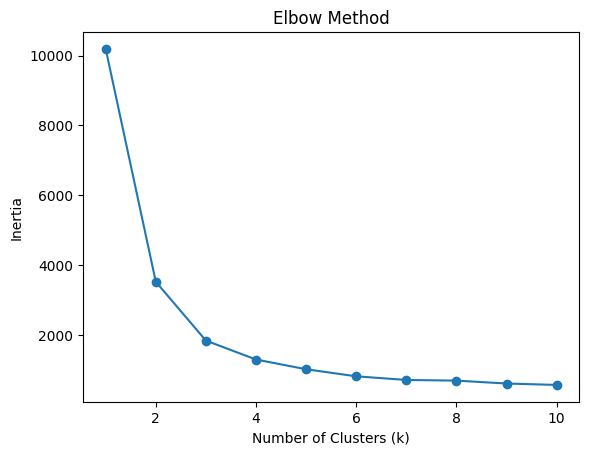

In [ ]:
#truedf= pd.concat([scaled_data,community_title],axis=1)

#Identify/Select desired indices from array of scaled_data
all = data.columns.tolist()
desired = ['PctKids2Par', 'PctKidsBornNeverMar', 'PctFam2Par','PctYoungKids2Par', 'PctTeen2Par','PctWorkMom']
indices = [all.index(col) for col in desired]
print(indices) #49, 55, 48, 50, 51, 53]

x = scaled_data[:,[49, 55, 48, 50, 51, 53]]


# Calculate inertia for different values of k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [42]:
print(x.shape)


(302, 6)


 From the uploaded elbow plot, the optimal number of clusters can be identified by the elbow point—the location where the rate of decrease in inertia slows significantly. Based on the plot, the elbow point appears around  k=4 because the curve flattens after this point.

So, 4 clusters would likely be a good choice for this dataset.

# Kmeans Cluster

In [20]:
# Fit the model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

# Access cluster labels (assignments for each data point)
labels = kmeans.labels_

# Access cluster centroids
centroids = kmeans.cluster_centers_

# Example: Print labels and centroids
print("Cluster Labels:", labels)
print("Cluster Centroids:\n", centroids)




Cluster Labels: [0 0 0 0 1 0 0 0 2 0 0 0 0 0 3 0 0 2 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0
 0 0 0 0 3 3 0 0 0 0 3 0 0 0 0 3 0 0 0 0 3 0 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0
 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0
 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0]
Cluster Centroids:
 [[-4.57180072e-02 -1.02898436e-01 -6.13800614e-02  7.91399356e-02
   6.34121435e-02  1.85653680e-02]
 [-1.63373494e+00  1.13021214e-01 -1.58020274e+00  8.37969636e+01
   1.15926641e+00 -4.46681346e-02]
 [-6.70797476e-01  9.54645208e-02 -5.52574041e-01  2.28994274e+01
   1.45785071e+00  2.19565901e-01]
 [-4.08720597e-01  2.33573425e-01 -2.90965246e-

Vizualize clusters

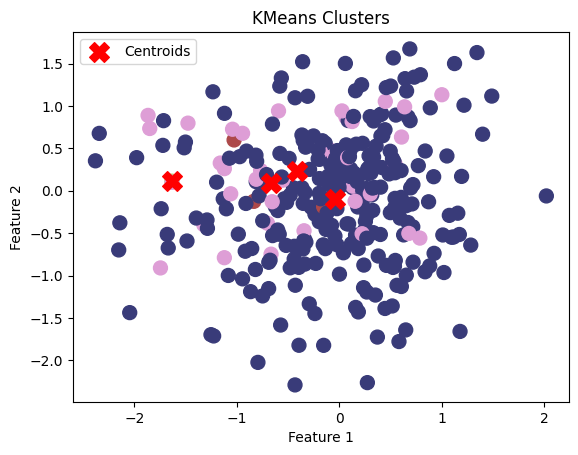

In [21]:
# Scatter plot of data points colored by cluster labels
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='tab20b', s=100)

# Scatter plot for cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add plot details
plt.title("KMeans Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

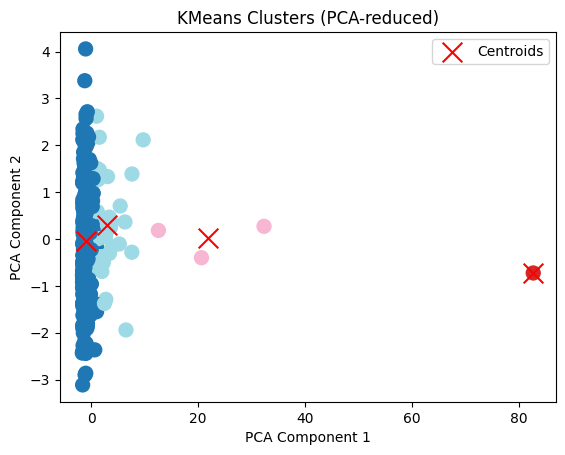

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce x to 2 dimensions using PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

# Perform KMeans clustering on reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_reduced)

# Extract labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=labels, cmap='tab20', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("KMeans Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [41]:
print(len(cluster_labels))

5


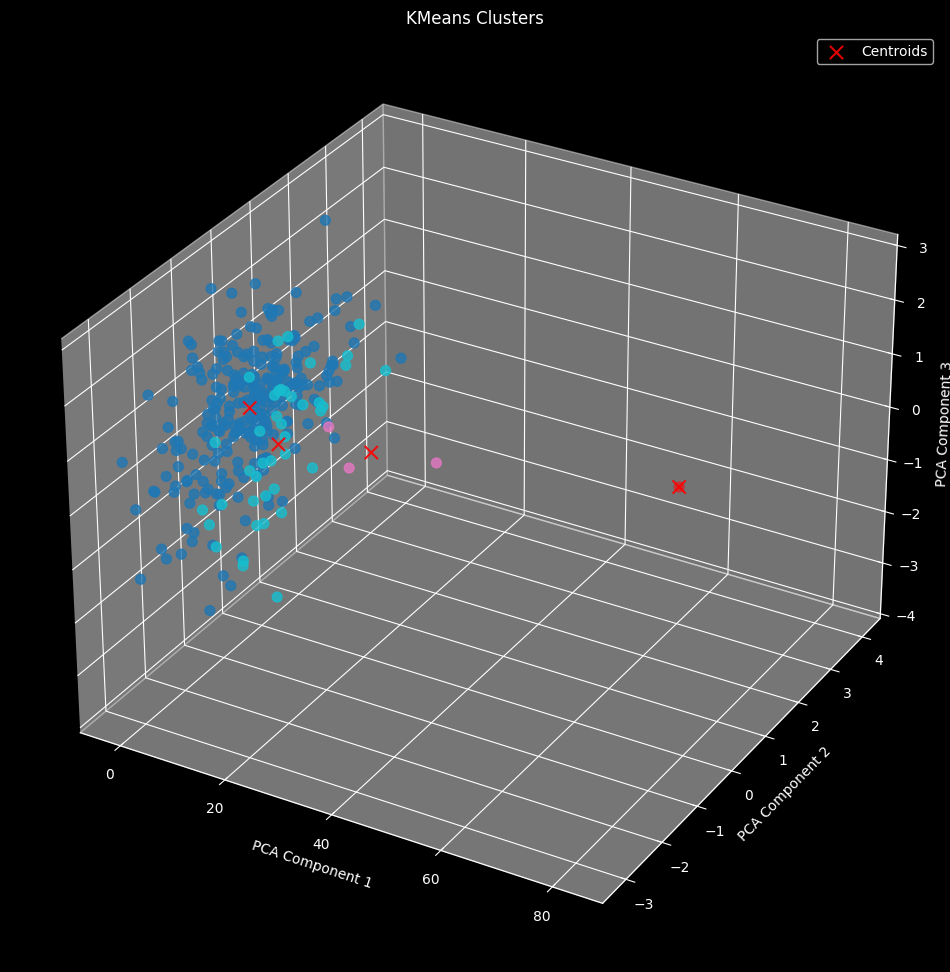

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
# Reduce x to 3 dimensions using PCA
pca = PCA(n_components=3)
x_reduced_3d = pca.fit_transform(x)
fourth_dim = x[:, 1]
point_size = x[:, 2] * 10  # Scale the size for visualization


# Perform KMeans clustering on reduced data
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(x_reduced_3d)

# Extract cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters in 3D
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')
#ax.set_facecolor('white')

# Scatter plot of data points
ax.scatter(
    x_reduced_3d[:, 0], x_reduced_3d[:, 1], x_reduced_3d[:, 2],
    c=labels, cmap='tab10', s=50, alpha=0.8
)

# Scatter plot of centroids
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', marker='x', s=90,alpha=0.9, label='Centroids'
)

# Add plot details

ax.set_title("KMeans Clusters")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()


/Applications/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


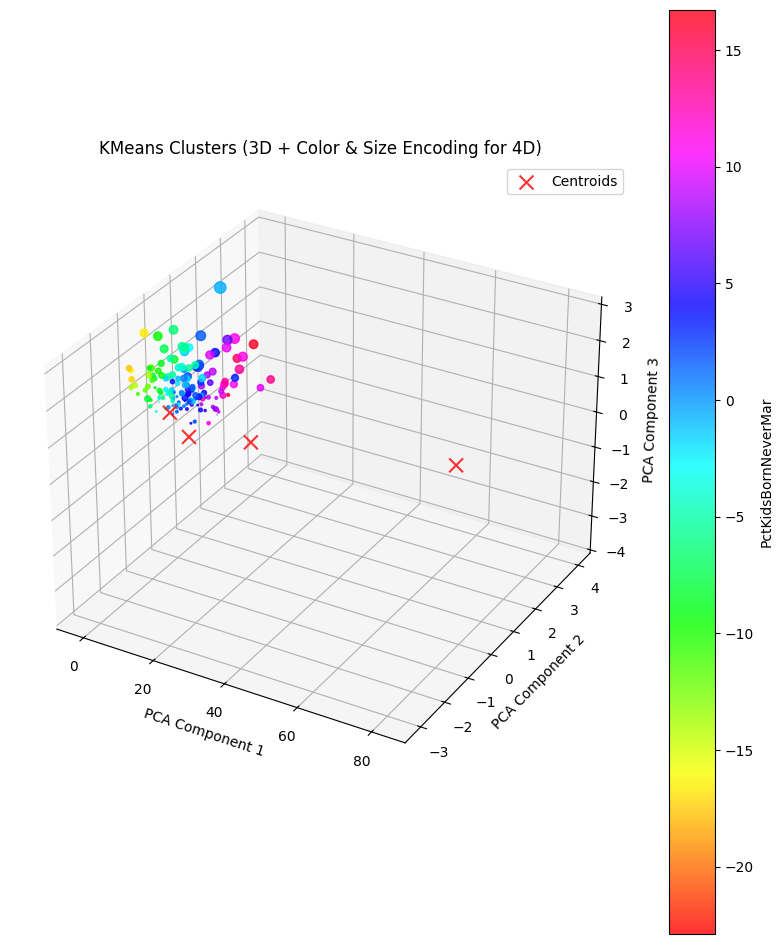

In [24]:
# Example: Use 'PctKidsBornNeverMar' as color and 'PctFam2Par' as size
plt.style.use('default')
fourth_dim = x[:, 1] *10  # Access column for color
point_size = x[:, 2] * 30  # Scale the size for visualization

# Modify the scatter plot to use both color and size encoding
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color and size encoding
scatter = ax.scatter(
    x_reduced_3d[:, 0], x_reduced_3d[:, 1], x_reduced_3d[:, 2],
    c=fourth_dim, cmap='hsv', s=point_size, alpha=0.8
)

# Scatter plot of centroids
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', marker='x', s=100, alpha=.8,label='Centroids'
)

# Add color bar for the fourth dimension
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("PctKidsBornNeverMar")  # Label for color encoding

# Add plot details
ax.set_title("KMeans Clusters (3D + Color & Size Encoding for 4D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()


## Anaylising using metrics

#### Sillouhette plot

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

sil_score = silhouette_score(no_Community_names, labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.6381478421838542


The silhouette score is a metric that measures how well a point is assigned to its cluster in a clustering problem. It provides insight into the quality of the clustering and evaluates how distinct the clusters are.



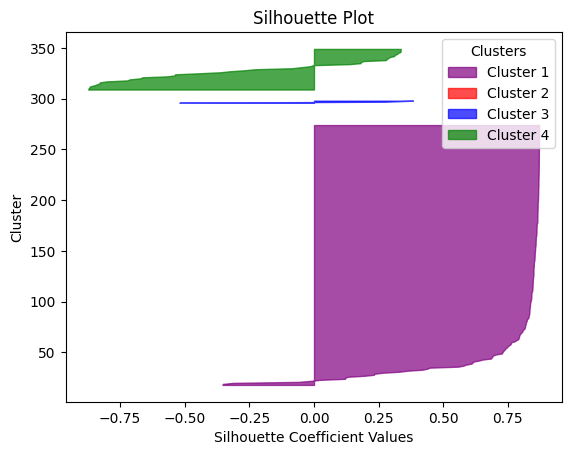

In [26]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
# Define cluster colors and labels
colors = ['purple', 'red', 'blue', 'green', 'orange']  # Add one color for each cluster
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Compute silhouette scores
sample_silhouette_values = silhouette_samples(no_Community_names, labels)

# Initialize the starting position for the first cluster
y_lower = 18

# Iterate through clusters
for i in range(4):  # Assuming 5 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]  # Select values for cluster i
    ith_cluster_silhouette_values.sort()  # Sort silhouette values for better visualization
    size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Number of points in the cluster
    y_upper = y_lower + size_cluster_i  # Define the y-axis range for the cluster

    # Plot silhouette scores for the current cluster
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        facecolor=colors[i],  # Use the color corresponding to the cluster
        edgecolor=colors[i],
        label=cluster_labels[i]  # Add label for the legend
    )
    y_lower = y_upper + 10  # Add spacing between clusters

# Add legend
plt.legend(loc='upper right', title='Clusters')

# Add titles and axis labels
plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")

# Display the plot
plt.show()

#### what the plot represents
Each cluster is represented by a distinct section of the plot.
Width of the silhouette: Indicates how well the points fit within that cluster.
A wide silhouette (close to 1) means points are well-clustered.
Narrow or negative silhouettes indicate points may belong to another cluster.


#### Inertia

In [27]:
print(f"Inertia: {kmeans.inertia_}")

print(f'normalized intertia: {kmeans.inertia_ / scaled_data.shape[0]}')

Inertia: 1125.9328735806735
normalized intertia: 3.7282545482803755


This tells us the average squared distance from the centroid from each point is 3.7 or 4.

Inertia is influenced by the scale and number of features in your dataset. To get a sense of whether inertia is high, normalize it by dividing by the number of points in the dataset


Definition: Inertia measures how tightly data points are clustered around their respective centroids. Lower inertia generally indicates better clustering.

High Inertia:

Clusters are not well-formed, with points far from the centroids.
Likely caused by too few clusters (
𝑘
k is too small).
Low Inertia:

Clusters are tighter and more well-formed.
However, inertia will always decrease as 
𝑘
k increases because adding more clusters reduces the average distance to the centroids.
Optimal Inertia:

Look for a balance where inertia stops decreasing significantly with increasing 
𝑘
k.

# How to interpret the model

To understand how the clusters have been grouped and interpret the PCA components, you can analyze the following:

Cluster Centroids: Examine the values of the cluster centroids in the original feature space to understand the characteristics of each cluster.

PCA Component Loadings: Check the contribution (weights) of each original feature to each PCA component to understand what the components represent.

Cluster Assignments: Look at how individual data points have been assigned to clusters.

Analyze Cluster Centroids
The cluster centroids represent the "average" position of all points within each cluster. You can back-project these centroids to the original feature space to interpret them.

In [28]:
#turn everything back to a DF so that we can anaylyze

new_scaled_data= pd.DataFrame(scaled_data,columns= no_Community_names.columns)

print(type(new_scaled_data))


<class 'pandas.core.frame.DataFrame'>


In [29]:
columns = ['PctKids2Par', 'PctKidsBornNeverMar', 'PctFam2Par','PctYoungKids2Par', 'PctTeen2Par','PctWorkMom']


dfx= pd.DataFrame(x, columns= columns)

print(type(dfx))

<class 'pandas.core.frame.DataFrame'>


In [30]:
columns = ['PctKids2Par', 'PctKidsBornNeverMar', 'PctFam2Par','PctYoungKids2Par', 'PctTeen2Par','PctWorkMom']


dfx= pd.DataFrame(x, columns= columns)



# Get the cluster centroids in the original feature space
centroids = kmeans.cluster_centers_

# If PCA was applied, invert the transformation to get original feature centroids
centroids_original_space = pca.inverse_transform(centroids)

# Create a DataFrame for easy interpretation
centroids_df = pd.DataFrame(centroids_original_space, columns=dfx.columns)

print("Cluster Centroids in Original Feature Space:")
print(centroids_df)

Cluster Centroids in Original Feature Space:
   PctKids2Par  PctKidsBornNeverMar  PctFam2Par  PctYoungKids2Par  \
0    -0.034443            -0.116338   -0.042798          0.060964   
1    -1.572402            -0.184377   -1.271929         83.740215   
2    -0.707031             0.209857   -0.588120         22.910427   
3    -0.460531             0.300284   -0.401164          3.802484   

   PctTeen2Par  PctWorkMom  
0     0.151786   -0.000094  
1     2.952637   -0.445755  
2     1.100694    0.245965  
3     0.510898    0.426706  


Understand PCA Components
PCA components are linear combinations of the original features. You can examine the PCA loading matrix to see how much each original feature contributes to each principal component.



Interpretation
Each row corresponds to a PCA component.
Each column represents an original feature.
The values indicate the weight (contribution) of each feature to the component:
Large positive or negative values show strong influence.
Features with small absolute values contribute less to that component.
For example:

If PctKidsBornNeverMar has a high positive weight in PCA Component 1, that feature strongly influences the variance captured by that component.

In [31]:
# Get PCA components (loading matrix)
pca_components = pd.DataFrame(
    pca.components_,
    columns=dfx.columns,  # Original feature names
    index=[f"PCA Component {i+1}" for i in range(pca.n_components_)]
)

print("PCA Component Loadings:")
print(pca_components)


PCA Component Loadings:
                 PctKids2Par  PctKidsBornNeverMar  PctFam2Par  \
PCA Component 1    -0.024602             0.009678   -0.019658   
PCA Component 2     0.394328             0.538808    0.435328   
PCA Component 3     0.592216            -0.373083    0.535332   

                 PctYoungKids2Par  PctTeen2Par  PctWorkMom  
PCA Component 1          0.998688     0.038746    0.005896  
PCA Component 2          0.004427     0.132918    0.589062  
PCA Component 3          0.041168    -0.260583   -0.392315  


Compenent 1 - PctYoungKids2Par
Component 2 - PctWorkMom
Component 3 - PctKids2Par


3. Examine Cluster Assignments
To see how individual data points are grouped into clusters, you can add the cluster labels to your original dataset and analyze the distribution of clusters.



In [ ]:
# Add cluster labels to the original data
dfx['Cluster'] = labels

# Check the first few rows
print(dfx.head())

# Analyze the distribution of clusters
print(dfx['Cluster'].value_counts())

newdf = pd.concat([community_title,no_Community_names])

#newdf['Cluster'] = clu



   PctKids2Par  PctKidsBornNeverMar  PctFam2Par  PctYoungKids2Par  \
0     0.130120             0.036211    0.021467          0.054255   
1     0.317384            -0.049378    0.448420          0.192329   
2    -1.233046             1.166423   -0.974359         -0.026129   
3     0.446816             0.719459    0.341085         -0.047863   
4    -1.633735             0.113021   -1.580203         83.796964   

   PctTeen2Par  PctWorkMom  Cluster  
0     0.041506   -0.086191        0  
1     0.775097    1.234980        0  
2    -0.361969    1.774772        0  
3    -0.502896    0.352941        0  
4     1.159266   -0.044668        1  
Cluster
0    257
3     41
2      3
1      1
Name: count, dtype: int64


NameError: name 'clu' is not defined

Interpretation
The new Cluster column assigns each data point to a specific cluster.
Use .value_counts() to see how many data points are in each cluster.
You can also compute the mean of each feature per cluster to understand group characteristics:
python



In [ ]:
cluster_means = dfx.groupby('Cluster').mean()
print(cluster_means)


         PctKids2Par  PctKidsBornNeverMar  PctFam2Par  PctYoungKids2Par  \
Cluster                                                                   
0          -0.287477            -0.683140   -0.342965         -0.070145   
1          -1.633735             0.113021   -1.580203         83.796964   
2          -0.930120             0.237015   -0.735838         27.543508   
3          -0.449045             0.038754   -0.326376          5.727074   
4           0.113930             0.436926    0.145708          0.481416   

         PctTeen2Par  PctWorkMom  
Cluster                           
0          -0.123205   -0.580414  
1           1.159266   -0.044668  
2           1.144788    0.294432  
3           1.283186    0.134124  
4           0.334740    0.568325  


4. Visualize the Feature Contributions
Visualizing PCA Loadings
You can plot the contribution of each feature to each PCA component to better understand their influence:



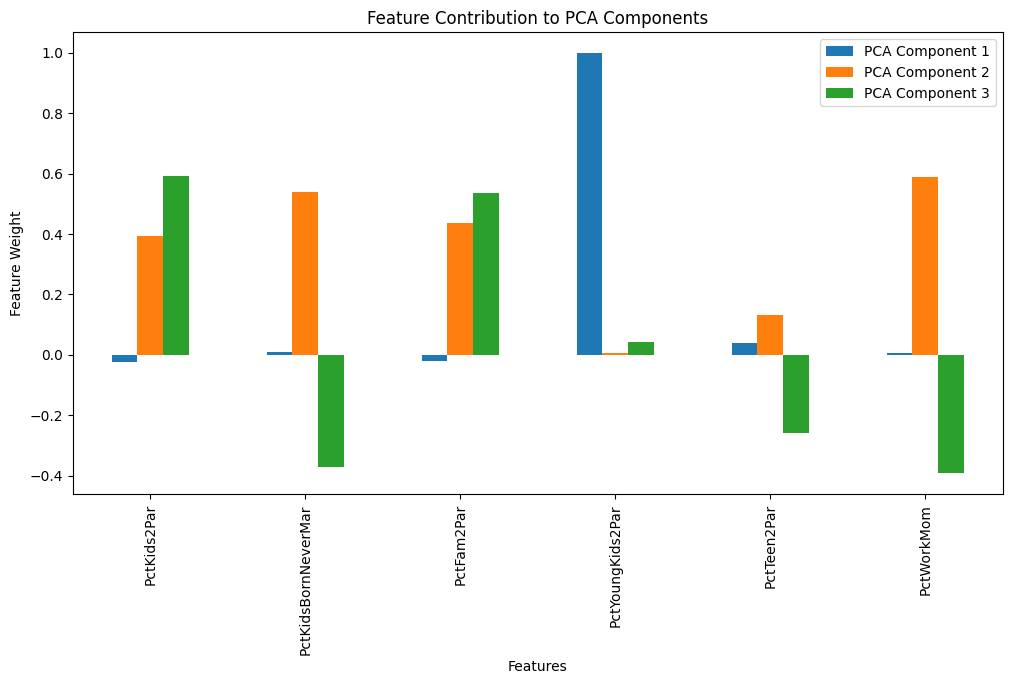

In [ ]:
# Visualize PCA component contributions
pca_components.T.plot(kind='bar', figsize=(12, 6), legend=True)
plt.title("Feature Contribution to PCA Components")
plt.ylabel("Feature Weight")
plt.xlabel("Features")
plt.show()



In [ ]:
pca_components






,PctKids2Par,PctKidsBornNeverMar,PctFam2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMom
PCA Component 1,-0.024602,0.009678,-0.019658,0.998688,0.038746,0.005896
PCA Component 2,0.394328,0.538808,0.435328,0.004427,0.132918,0.589062
PCA Component 3,0.592216,-0.373083,0.535332,0.041168,-0.260583,-0.392315


# attempt to add new feature into the dataset

In [49]:
# Add cluster labels to the original data
dfx['Cluster'] = labels

# Check the first few rows
print(dfx.head())

# Analyze the distribution of clusters
print(dfx['Cluster'].value_counts())

newdf = pd.concat([no_Community_names])

newdf['Cluster'] = cluster_labels

   PctKids2Par  PctKidsBornNeverMar  PctFam2Par  PctYoungKids2Par  \
0     0.130120             0.036211    0.021467          0.054255   
1     0.317384            -0.049378    0.448420          0.192329   
2    -1.233046             1.166423   -0.974359         -0.026129   
3     0.446816             0.719459    0.341085         -0.047863   
4    -1.633735             0.113021   -1.580203         83.796964   

   PctTeen2Par  PctWorkMom  Cluster  
0     0.041506   -0.086191        0  
1     0.775097    1.234980        0  
2    -0.361969    1.774772        0  
3    -0.502896    0.352941        0  
4     1.159266   -0.044668        1  
Cluster
0    257
3     41
2      3
1      1
Name: count, dtype: int64


ValueError: Length of values (5) does not match length of index (302)

In [35]:
original_centroids = scaler.inverse_transform(centroids)

ValueError: operands could not be broadcast together with shapes (4,3) (143,) (4,3) 